# MSc Data Science
# DSM150 Neural Networks Coureswork
# Prediction of Obesity Levels Based on Eating Habits and Physical Condition

> # Section One

# 1: Introduction

In 2020, there was a rapid increase (39%) of overweight adults with a BMI over 25. Moving forward, the obesity problem is expected to get worse and is estimated to reach 50% if it continues to increase by the same rate in 2030. There has been an ever-increasing interest to study obesity due to the massive impact on health-related consequences and clinical complications. 

Moreover, obesity reduces life expectancy and negatively impact the quality of life. Initially, obesity was more dominant in developed countries. However, now it is observed in developing countries as well, alongside other complications such as hunger and poverty. There is a limitation of this dataset to develop neural networks. However, many researchers and coders used it in the area of machine learning.

Below are two recent examples in one of the previous studies that tried to predict obesity levels by experimenting on four models (Decision Trees, Random Forest, SVM and K Nearest Neighbours). Random Forest was identified as an initial model with an accuracy of around 79% and concluded after hyperparameter tuning that the accuracy reached 92%.
Another model that also looked into predicting obesity was using multiple models by identifying the most suitable model with parameters using GridSearchCV between the following models (SVM, Random_Forest, Logistic_Regression, etc. Decision_Tree, KNN). Initially, SVM achieved 96% accuracy and then the model was improved by obtaining an optimized train-test split using Variance Bias Tradeoff. Accordingly, the model was able to predict obesity levels with an accuracy of 98%.



## 1.1 Problem Definition 
The analysis has been conducted with an attempt to **predict obesity levels based on eating habits and physical condition**. This problem is a single label multiclass classification and will be detailed further when describing the dataset. The main objective of this coursework is to enhance a model that is more accurate than the baseline model. More specifically, building a network that will be trained on a portion of the dataset (training set), validated on the validation set, then used the tuned hyperparameters with the optimum epoch to train on the whole training set and the model accordingly will be able to predict unseen dataset (test set).

## 1.2 Hypotheses
The model is developed keeping the following hypothesis in mind:
- The obesity level can be predicted based on the dataset features.
- The dataset is sufficient to understand the relationship between the obesity level and the provided features 

## 1.3 Document Structure
The Notebook will be structured into three main sections. The 1st section is the topic introduction, data overview and pre-processing. The 2nd section covers the neural networks modelling both baseline and enhanced models, while the 3rd section provides a conclusion, model results, references and appendix.

# 2: Methodology and Model Architecture 

## 2.1 Methodology
The first step into pre-processing is checking for missing values and outliers. In addition, cleaning the data by removing duplications so the training and testing sets are disjoint. By avoiding that, there will not be redundancy in training and validation sets, which might have an effect when evaluating on unseen data points
Moreover, feature scaling was utilized for numerical variables using MinMaxScaler as the numeric features do not fit a Gaussian distribution. Following that, in general, a categorical variable could be either ordinal or nominal. For ordinal variables, integer encoding is applied because the order matters here. While in the nominal variables, one-hot encoding was the preferred technique for encoding, since integer encoding means each integer category is ordered. 

On the other hand, there are two approaches to encode the target variable, integer or one-hot encoding. One-hot encoding will be the selected approach in this coursework given that the categorical variable is nominal. However, at the end of the modelling section, integer encoding is briefly tested as well.
After preparation, the dataset was split into train/test (80/20) using Sickit-learn. While little training data is available, training was split into validation using k-fold cross-validation.


The next step was to initialize a simple baseline model with one fully connected hidden layer, and the number of neurons was the same as the input size. then, a simple neural network model was developed with higher accuracy than the baseline model. Subsequently, by increasing the batch size, layers, neurons and adding more epochs, then the model started to overfit
To overcome the overfitting issue, three methods were applied successfully. Nevertheless, hyperparameters tuning was applied by tuning the batch size, number of layers, learning rate and activation function.
In the end, little attention was given to applying an integer encoding for the target variable. The next step was adjusting the model with the optimum hyperparameter and optimum epoch and applying that for the training set and testing it in the test set, then making the required prediction and comparing the accuracies.
More details regarding the choice of the used hyperparameters will be further detailed next in the model architecture.

## 2.2 Model architecture 

The below factors have been taking into account while developing and tuning the neural network model

1. **Last layer activation:** based on the classification problem, softmax activation will be used as the last layer to output the probability distribution for the seven output classes, which sums up to one
2. **Loss function:** there are two suitable functions for this kind of classification problem. In this course work, the main focus is on the categorical_crossentropy since the encoding for the target variable was one-hot encoding. While the main focus was on using one-hot encoding. However, at the end of section two, a partial analysis has been conducted whereby the target variable is encoded using integer encoding, and accordingly, sparse_categorical_crossentropy is used as a loss function
3. **Accuracy metrics:** given that the dataset is relatively class-balanced – the frequency of obesity levels is almost the same
4. **RMSprop optimizer:** will be used throughout the coursework by tweaking the value of the learning rate parameter
5. **The other model parameters:** continuous tuning will be applied until the optimized configuration is reached



# 3: Data Overview and Pre-processing

In [701]:
# install packages
%pip install tensorflow
%pip install notebook-as-pdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

import sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [704]:
# random value generator to have a reproducible results
seed = 50
np.random.seed(seed)

tf.random.set_seed(123) 

In [702]:
print(tf.__version__, ' ', tf.keras.__version__)

2.7.0   2.7.0


## 3.1 Dataset Description
Data was collected through a web page using a survey applied to undergraduate students of universities in Colombia, México and Perú, which evaluated their eating habits and some aspects that helped identify their physical condition. Dataset is available in UCI Machine Learning Repository and accessible from the following link  (<a href="https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#">here</a>)

The dataset contains data for estimating obesity levels based on their eating habits and physical condition. The data include 17 variables (16 inputs and 1 target variable) with 2,111 records. Based on the dataset structure, a supervised learning technique will predict the output. The chosen model is a single label, multiclass classification.

The description of abbreviated columns name:
- **FAVC:** frequent consumption of high caloric food
- **FCVC:** frequency of consumption of vegetables
- **NCP:** number of main meals
- **CAEC:** consumption of food between meals
- **CH2O:** consumption of water daily
- **SCC:** calories consumption monitoring
- **FAF:** physical activity frequency
- **TUE:** time using technology devices
- **CALC:** consumption of alcohol 
- **MTRANS:** transportation

The single label is the obesity level which shows the classification of seven levels (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III).

In [705]:
# read the csv file into a pandas DataFrame and assign it to the variable (df)
df = pd.read_csv (r'ObesityDataSet_raw_and_data_sinthetic.csv')

# rename the target variable to be more clear
df.rename(columns = {'NObeyesdad':'obesity_type'}, inplace = True) 

df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_type
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [706]:
# dataframe shape
df.shape

(2111, 17)

## 3.2 Missing Values Checking

In [707]:
# check the missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
obesity_type                      0
dtype: int64

> No missing values detected

## 3.3 Data Types

> The data types of this dataset are nominal, ordinal and numeric. By default, they will be categorised as an object or float. Therefore,  the data types will be converted to a suitable category either if they are ordinal, numerical or nominal.

In [708]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### 3.3.1 Nominal (Non-ordered Categorical)

In [709]:
# set data types for unordered variables
dtypes = {'Gender': 'category', 'family_history_with_overweight': 'category', 'FAVC': 'category', 
          'SMOKE': 'category', 'SCC': 'category', 'MTRANS': 'category'}
df = df.astype(dtypes)

In [710]:
# inspect data type for one unordered variable
df['Gender'].dtype

CategoricalDtype(categories=['Female', 'Male'], ordered=False)

### 3.3.2 Ordinal (Ordered Categorical)

In [711]:
# set data types for ordered variables
scale = ['no', 'Sometimes', 'Frequently', 'Always']
df[['CAEC', 'CALC']] = df[['CAEC', 'CALC']] .astype(pd.CategoricalDtype(ordered = True, categories = scale))

obes_level = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
df['obesity_type'] = df['obesity_type'].astype(pd.CategoricalDtype(ordered = True, categories = obes_level))

In [712]:
# inspect dtype for one variable to make sure it is actually ordered
df['CAEC'].dtype

CategoricalDtype(categories=['no', 'Sometimes', 'Frequently', 'Always'], ordered=True)

In [713]:
# inspect the data types after converting 
df.dtypes

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
obesity_type                      category
dtype: object

## 3.4 Drop Duplication

Duplicated values will be removed to avoid any redundancy in the data, since having the same data points in the training and test datasets would have negativly effect the model accuracy when testing on unseen data.

In [714]:
# check for duplication
print('Number of duplicated data points:', df.duplicated().sum())

Number of duplicated data points: 24


In [715]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [716]:
# validate the data after dropping duplicates
df.duplicated().sum()

0

## 3.5 Data Summary Statistics

In [717]:
# create a summary table for numerical features
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


> The average age is around 24.3 and median is 22.8 years old. Average Height and Weight is 1.7 meter and 86.8 kg respectivley.
> When looking at the min-max, it is clear that age has a huge difference between 14 and 61, while the weight is ranging from 39 to 173. 

In [718]:
# create a summary table for categorical features
df.select_dtypes(include=['category']).describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,obesity_type
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


> Male records are more than Female with 1052. While majority (82%) have family history with overwight. Also the most observed obesity type was type I and the most popular transportaion medium is public transportation.

## 3.6 Exploratory Data Analysis (EDA)
### 3.6.1 Frequency Check for Categorical Variables

In [719]:
# counts for categorical variables
counts = tuple(df.select_dtypes(include = ['category']).columns)
for column in counts:
    print(f'{column} frequency:')
    print(df[column].value_counts(), '\n')

Gender frequency:
Male      1052
Female    1035
Name: Gender, dtype: int64 

family_history_with_overweight frequency:
yes    1722
no      365
Name: family_history_with_overweight, dtype: int64 

FAVC frequency:
yes    1844
no      243
Name: FAVC, dtype: int64 

CAEC frequency:
Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64 

SMOKE frequency:
no     2043
yes      44
Name: SMOKE, dtype: int64 

SCC frequency:
no     1991
yes      96
Name: SCC, dtype: int64 

CALC frequency:
Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64 

MTRANS frequency:
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64 

obesity_type frequency:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweigh

### 3.6.2 Frequency Check for Obesity Level (Target Variable)

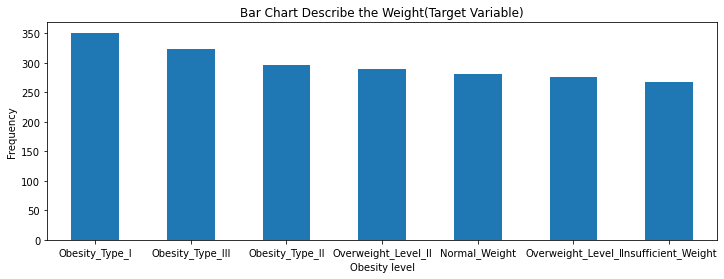

In [720]:
# plot a bar chart to check if the target variable is balanced
ax = df['obesity_type'].value_counts().plot.bar(figsize=(12, 4))

# set the axes labels and the title
ax.set_xlabel('Obesity level')
ax.set_ylabel('Frequency')
ax.set_title('Bar Chart Describe the Weight(Target Variable)')
ax.tick_params(axis = 'x', rotation = 0)

plt.show()

> The obesity level looks relatively balanced with slightly high frequency for Obesity_Type_I and Obesity_Type_III, whereas to some extent less data is recorded for Insufficient_Weight level

### 3.6.3 Outliers Check for Numeric Variables

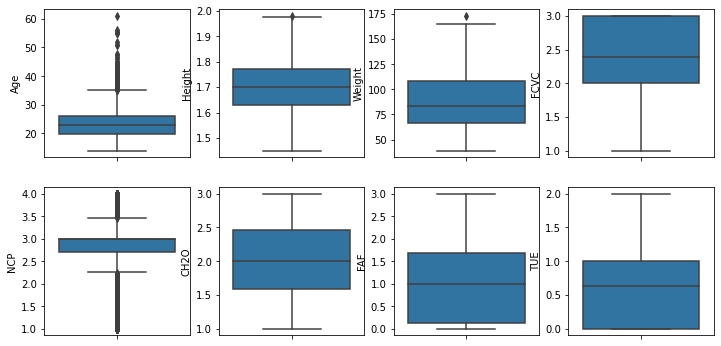

In [721]:
# check for outliers
df_numeric = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (12, 6))
i = 0
axes = axes.flatten()
for j, k in df_numeric.items():
    sns.boxplot(y = j, data = df_numeric, ax = axes[i])
    i += 1

plt.show()

In [722]:
np.median(df.Age)

22.847618

> Age variable shows considerable number of outliers with age more than 35 years old and median around 23 years old. This will be cleaned by removing some of the outliers as below.

<AxesSubplot:>

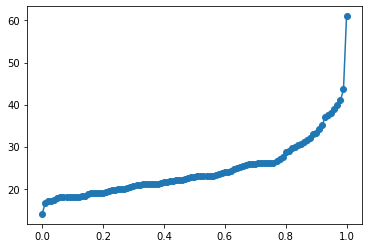

In [723]:
# there is one outlier above 60
df['Age'].quantile(np.arange(0, 1.01, 0.01)).plot(marker = 'o')

In [724]:
df['Age'].quantile(np.arange(0, 1.01, 0.01))

0.00    14.000000
0.01    16.595757
0.02    17.000000
0.03    17.038707
0.04    17.415991
          ...    
0.96    38.948649
0.97    39.979975
0.98    40.978655
0.99    43.593805
1.00    61.000000
Name: Age, Length: 101, dtype: float64

<AxesSubplot:>

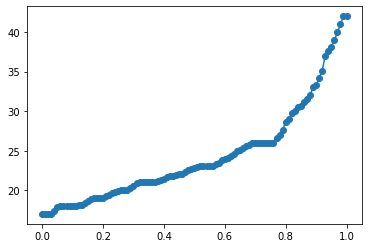

In [725]:
# remove the values above 41 and below 17
df['Age'] = df['Age'].apply(lambda x : 42 if x > 41 else x)
df['Age'] = df['Age'].apply(lambda x : 17 if x < 17 else x)

df['Age'].quantile(np.arange(0,1.01,0.01)).plot(kind = 'line', marker = 'o')

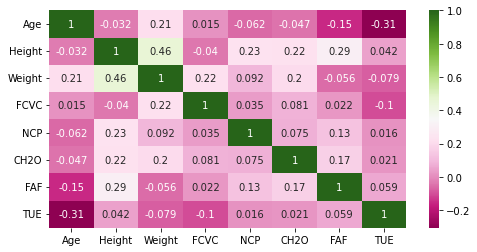

In [726]:
# correlation between numeric variables
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot = True, cmap = 'PiYG')
plt.show()

> Height and weight are highly correlated which is expected. However, the other model features are  decoupled with highest positive correlation at just 0.29 between Height and FAF.



# 4: Preparing the Data

## 4.1 Feature Scaling for Numeric Variables

> Numerical variables were scaled to be at the same range from 0 to 1, while those features do not fit the Gaussian distribution then MinMaxScaler was used

In [727]:
# scaling numerical features
df_norm_scaled = df.loc[:, ('Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE')]
for i in df_norm_scaled.columns:
    df[i] = MinMaxScaler().fit_transform(df_norm_scaled[[i]])
    
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_type
0,Female,0.16,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,Normal_Weight
1,Female,0.16,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.24,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,Normal_Weight
3,Male,0.40,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,Overweight_Level_I
4,Male,0.20,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 4.2 Encoding Target Variable

### 4.2.1 Integer Encoding

In [731]:
# encode the target variable as integer using Label encoder function
encoder = preprocessing.LabelEncoder() 
y = df['obesity_type'].values.reshape(-1)
df['obesity_type'] = encoder.fit_transform(y) 
y = df['obesity_type']

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_type
0,Female,0.16,0.320755,0.186567,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.000000,0.5,no,Public_Transportation,1
1,Female,0.16,0.132075,0.126866,yes,no,1.0,0.666667,Sometimes,yes,1.0,yes,1.000000,0.0,Sometimes,Public_Transportation,1
2,Male,0.24,0.660377,0.283582,yes,no,0.5,0.666667,Sometimes,no,0.5,no,0.666667,0.5,Frequently,Public_Transportation,1
3,Male,0.40,0.660377,0.358209,no,no,1.0,0.666667,Sometimes,no,0.5,no,0.666667,0.0,Frequently,Walking,5
4,Male,0.20,0.622642,0.379104,no,no,0.5,0.000000,Sometimes,no,0.5,no,0.000000,0.0,Sometimes,Public_Transportation,6


In [733]:
# number of unique classes
np.unique(df['obesity_type']).shape[0]

7

### 4.2.2 One-hot Encoding

> It is the preferred choice for unordered variables, as integer gives sense of the values are ordered

In [735]:
# one-hot encoding
y_one_hot = to_categorical(df['obesity_type'], 7)
y_one_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## 4.3 Encoding Feature Variables

> Variables encoding helps the machine learning model to deal with categorical variables by transforming them into numeric 

### 4.3.1 Ordered Categorical (Ordinal)

> Integer encoding was used for ordinal variables as order matters here.

In [ ]:
# categorical variables (ordinal)
# CALC encoding
df['CALC'] = encoder.fit_transform(df['CALC'])

# CAEC encoding
df['CAEC'] = encoder.fit_transform(df['CAEC'])

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,obesity_type
0,Female,0.16,0.320755,0.186567,yes,no,0.5,0.666667,2,no,0.5,no,0.000000,0.5,3,Public_Transportation,1
1,Female,0.16,0.132075,0.126866,yes,no,1.0,0.666667,2,yes,1.0,yes,1.000000,0.0,2,Public_Transportation,1
2,Male,0.24,0.660377,0.283582,yes,no,0.5,0.666667,2,no,0.5,no,0.666667,0.5,1,Public_Transportation,1
3,Male,0.40,0.660377,0.358209,no,no,1.0,0.666667,2,no,0.5,no,0.666667,0.0,1,Walking,5
4,Male,0.20,0.622642,0.379104,no,no,0.5,0.000000,2,no,0.5,no,0.000000,0.0,2,Public_Transportation,6


### 4.3.2 Non-ordered Categorical (Nominal)

> For unordered variables, one-hot encoding was used, so that each value either exists or not.

In [737]:
# categorical variables (nominal)
df = pd.get_dummies(df, columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE','SCC', 'MTRANS'])
df.head()

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,FAVC_yes,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.16,0.320755,0.186567,0.5,0.666667,2,0.5,0.000000,0.5,3,...,0,1,0,1,0,0,0,0,1,0
1,0.16,0.132075,0.126866,1.0,0.666667,2,1.0,1.000000,0.0,2,...,0,0,1,0,1,0,0,0,1,0
2,0.24,0.660377,0.283582,0.5,0.666667,2,0.5,0.666667,0.5,1,...,0,1,0,1,0,0,0,0,1,0
3,0.40,0.660377,0.358209,1.0,0.666667,2,0.5,0.666667,0.0,1,...,0,1,0,1,0,0,0,0,0,1
4,0.20,0.622642,0.379104,0.5,0.000000,2,0.5,0.000000,0.0,2,...,0,1,0,1,0,0,0,0,1,0


In [738]:
# float values were rounded to two decimal places
df = round(df)
y = df['obesity_type'].values.reshape(-1)
x = df.drop(['obesity_type'], axis=1).values
print('\n', "Length of x :", x.shape,'\n' , "Length of y :", y_one_hot.shape, '\n') # y with one hot encoding is applied
x


 Length of x : (2087, 25) 
 Length of y : (2087, 7) 



array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

> # Section Two

In this section the dataset was split into train and test, then the train data was split further also into partial train and test set. The model was trained on the partial train then validated in the validation set. The baseline model was initialized to be compared to the developed model. 

Following that, a small model with a statistical power that beats the baseline was initialized, then the capacity was increased by adding more layers, batch size, units and epochs. When the model overfitted and reached high accuracy and low loss, but it failed to be generlized which was clear in the validation set. 

Three approches were applied to overcome the overfitted model, with various hyperparameters tuning and optimum epoch until a robust model in the validation set was reached. 

Moreover, the dataset was then retrained on the train set and validated on the test set with those optimum hyperparameters and optimum epoch number. Then, the new labels were predicted for the target variable and the accuracy was returned.

While tuning the hyperparameters, precaution was given to tune them multiple times to avoid any information leak during train and validation phases.

# 1: Split Dataset into Train/Test Set Using One Hot Encoding for the Target Variable

In [352]:
# split the data into train and test 80/20
# set a seed to reproduce the same split everytime
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size = 0.2, random_state = seed)

In [353]:
# check the shape of train and test sets
print('Train set:', '\n', "Length of x_train :", x_train.shape,'\n' , "Length of y_train :", y_train.shape, '\n')
print('Test set:', '\n', "Length of x_test :" , x_test.shape, '\n', "Length of y_test :", y_test.shape)

Train set: 
 Length of x_train : (1669, 25) 
 Length of y_train : (1669, 7) 

Test set: 
 Length of x_test : (418, 25) 
 Length of y_test : (418, 7)


In [354]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [355]:
print(x_train[0])
print(x_test[0])

[0. 0. 0. 1. 1. 2. 0. 1. 0. 3. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0.]
[0. 1. 1. 1. 1. 2. 1. 0. 0. 2. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0.]


# 2. Baseline Model

> Below, a simple baseline model was developed with only one hidden layer and number of units were equal to the number of input which was 25. Softmax, as mentioned in the model architecture, was used throughout the modelling phases. Then we trained the model on x_train and y_train and tested it on unseen data.

> A baseline model was designed and its accuracy set to be beated by the first model. There are many options to set a baseline such as setting a dummy classifier or set a small model with one hidden layer, the same way it was implemented below.

In [465]:
# define baseline model
def baseline_model():
    
    model = Sequential()
   
    model.add(layers.Dense(25, activation = 'relu', input_shape = (25,)))
    model.add(layers.Dense(7, activation = 'softmax')) 
    
    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')
    
    return model

model = baseline_model()

model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 0)
baseline_loss, baseline_accuracy = model.evaluate(x_test, y_test, verbose = 0)

print('\n', 'Baseline Model Accuracy:', '%.f'% (baseline_accuracy*100), '%')


 Baseline Model Accuracy: 40 %


> The baseline accuracy is 40%. The next step is to build a small model that beats this accuracy

# 3. Building the Network

> This model function will be called almost every time with a slight change in its parameters by adding/removing layer(s) oradding a dropout after each layer

In [466]:
# define a model function with units parameters to be easily called every time
def create_model(neuron1, neuron2):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, activation = 'relu', input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dense(neuron2, activation = 'relu'))                          # add second hidden layer
    model.add(layers.Dense(7, activation = 'softmax'))                             # add output layer

    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'rmsprop')

    return model

# model.summary()

# 4. Splitting the Training Set Using K-fold Cross-validation

> The training set was splitted into partial training and validation set. Also, Validation score logs will be saved at each fold

> fold will be used here since the dataset is relatively small, if hold out used the small portion of training will be splitting again to validation

In [449]:
def evaluate_model(neuron1, neuron2, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val = x_train[iFold * nVal : (iFold + 1) * nVal]
        y_val = y_train[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train = np.concatenate([x_train[ : iFold * nVal], x_train[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train = np.concatenate([y_train[ : iFold * nVal], y_train[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model(neuron1, neuron2)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data = (x_val, y_val),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

# 5. Defining Plotting Function

In [426]:
# define the plot function with its various parameters
def plot(nEpoch, y1, style_1, label_1, y2, style_2, label_2, xlabel, ylabel, title):
    
    epochs = range(1, nEpoch + 1)
    plt.clf()
    
    plt.plot(epochs, y1, style_1, label = label_1)
    plt.plot(epochs, y2, style_2, label = label_2)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# 6. Develop a Statistical Power Model

> Here, a small and underfitted model is built to beat the defined baseline, this model will be gradually enhanced untill it is overfitted

## 6.1 Model 1: Developing a Basic Model: Evaluation Model

> A model that has a statistical power and higher accuracy than the baseline one is generated 

In [485]:
# set the function arguments
neuron1 = 8
neuron2 = 8
nEpoch = 10
BatchSize = 8

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
model1_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
model1_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
model1_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
model1_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

In [486]:
# get the accuracy average
model1_accuracy = max(model1_val_acc)
model1_accuracy

0.4912912845611572

### 6.1.1 Comparison Between the Baseline and Model 1

In [487]:
print('Baseline Model Score:', '%.f'% (baseline_accuracy*100), '%')
print('Model 1 Score:',  '%.f'% (model1_accuracy*100), '%')

Baseline Model Score: 40 %
Model 1 Score: 49 %


> There is a slight increase, therefore the basic model beats the baseline model achieving 49% accuracy

### 6.1.2 Plotting Training and Validation Loss

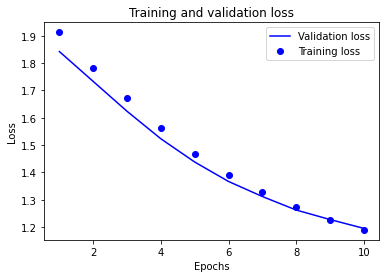

In [458]:
# call plot function and set its arguments
plot(nEpoch = 10, y1 = model1_val_loss, style_1 = 'b', label_1 = 'Validation loss', y2 = model1_train_loss, style_2 = 'bo', 
         label_2 = 'Training loss', xlabel = 'Epochs', ylabel = 'Loss', title = 'Training and validation loss')

> Getting an underfitted moddl with limited data points

### 6.1.3 Plotting Training and Validation Accuracy

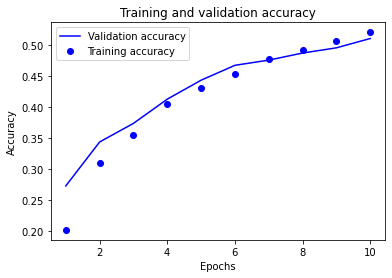

In [459]:
# call plot function and set its arguments
plot(nEpoch = 10, y1 = model1_val_acc, style_1 = 'b', label_1 = 'Validation accuracy', y2 = model1_train_acc, style_2 = 'bo', 
         label_2 = 'Training accuracy', xlabel = 'Epochs', ylabel = 'Accuracy', title = 'Training and validation accuracy')

## 6.2 Model 2: Increasing the Model capability

> The model was enhanced by adding more units, batch size and epoch

In [460]:
# set the function arguments
neuron1 = 16
neuron2 = 16
nEpoch = 100
BatchSize = 16

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
model2_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
model2_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
model2_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
model2_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

In [473]:
# get the accuracy average
model2_accuracy = np.max(model2_val_acc)
model2_accuracy

0.7075075149536133

### 6.2.3 Comparison Between the Baseline Model and Model 1 and 2

In [490]:
print('Baseline Model Score:', '%.f'% (baseline_accuracy*100), '%')
print('Model 1 Score:',  '%.f'% (model1_accuracy*100), '%')
print('Model 2 Score:',  '%.f'% (model2_accuracy*100), '%')

Baseline Model Score: 40 %
Model 1 Score: 49 %
Model 2 Score: 71 %


### 6.2.2 Plotting Training and Validation Loss

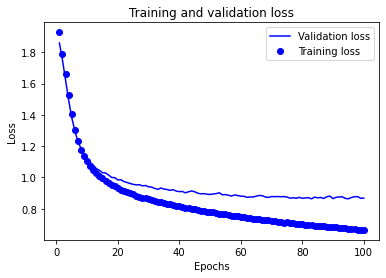

In [470]:
# call plot function and set its arguments
plot(nEpoch = 100, y1 = model2_val_loss, style_1 = 'b', label_1 = 'Validation loss', y2 = model2_train_loss, style_2 = 'bo', 
         label_2 = 'Training loss', xlabel = 'Epochs', ylabel = 'Loss', title = 'Training and validation loss')

### 6.2.3 Plotting Training and Validation Accuracy

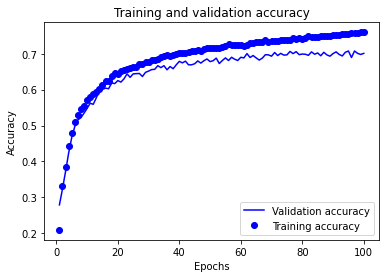

In [471]:
# call plot function and set its arguments
plot(nEpoch = 100, y1 = model2_val_acc, style_1 = 'b', label_1 = 'Validation accuracy', y2 = model2_train_acc, style_2 = 'bo', 
         label_2 = 'Training accuracy', xlabel = 'Epochs', ylabel = 'Accuracy', title = 'Training and validation accuracy')

## 6.3 Model 3: Build a Powerful and Overfitted Model

> Reaching a powerfull and overfitted model by adding more epochs and increasing the hyperparameters values

In [493]:
# set the function arguments
neuron1 = 64
neuron2 = 64
nEpoch = 500
BatchSize = 16

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
model3_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
model3_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
model3_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
model3_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

In [494]:
# get the accuracy average
model3_accuracy = np.max(model3_val_acc)
model3_accuracy

0.7579579591751099

### 6.3.1 Comparison Between the Baseline Model and Model 1, 2 and 3

In [495]:
print('Baseline Model Score:', '%.f'% (baseline_accuracy*100), '%')
print('Model 1 Score:',  '%.f'% (model1_accuracy*100), '%')
print('Model 2 Score:',  '%.f'% (model2_accuracy*100), '%')
print('Model 3 Score:',  '%.f'% (model3_accuracy*100), '%')

Baseline Model Score: 40 %
Model 1 Score: 49 %
Model 2 Score: 71 %
Model 3 Score: 76 %


### 6.3.2 Plotting Training and Validation Loss

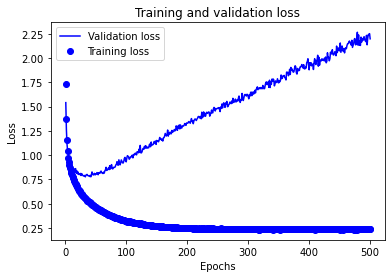

In [496]:
# call plot function and set its arguments
plot(nEpoch = 500, y1 = model3_val_loss, style_1 = 'b', label_1 = 'Validation loss', y2 = model3_train_loss, style_2 = 'bo', 
         label_2 = 'Training loss', xlabel = 'Epochs', ylabel = 'Loss', title = 'Training and validation loss')

### 6.3.3 Plotting Training and Validation Accuracy

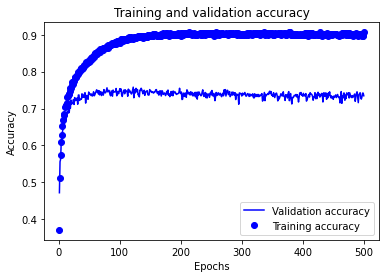

In [497]:
# call plot function and set its arguments
plot(nEpoch = 500, y1 = model3_val_acc, style_1 = 'b', label_1 = 'Validation accuracy', y2 = model3_train_acc, style_2 = 'bo', 
         label_2 = 'Training accuracy', xlabel = 'Epochs', ylabel = 'Accuracy', title = 'Training and validation accuracy')

> Everytime the model is enhanced with more layers, neurons, epochs, it will be more robust with statistical power. However, by increasing the size, the training data will get a higher accuracy and lower loss, but would still fail to be generlized in the validation set. Some approaches to reduce the overfitting will be implemented before applying this model on unseen data.

# 7. Overfitting Techniques

> Before implementing any technique, the overfitted model will be inintialised. As the dataset was downloaded from internet, hence there is no way to use the the approach of getting more training data. Thus, other techniques will be explored

## 7.1 Overfitted Model (Benchmark)

> This is the same overfitting model above, with less epoch value to be able to run it faster. Set this model as a benchmark and compare it with each overfitting technique. each technique that improves the model will be used in the next approach, untill the best overfitting approach and optimum hyperparameters are reached.

In [508]:
# set the function arguments
neuron1 = 64
neuron2 = 64
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
Overfitted_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
Overfitted_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
Overfitted_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
Overfitted_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

## 7.1.1 Plotting the Overfitted Training and Validation Loss Model

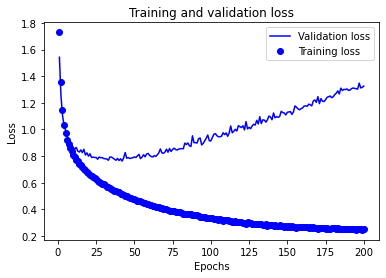

In [509]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = Overfitted_val_loss, style_1 = 'b', label_1 = 'Validation loss', y2 = Overfitted_train_loss, style_2 = 'bo', 
         label_2 = 'Training loss', xlabel = 'Epochs', ylabel = 'Loss', title = 'Training and validation loss')

## 7.2 First Technique: Reducing the Network’s Size

> There are 3 approaches that were applied to improve the overfitting

### 7.2.1 Model 1: Evaluation With 16 Neurons

In [510]:
# set the function arguments
neuron1 = 16
neuron2 = 16
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
reducedNs_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
reducedNs_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
reducedNs_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
reducedNs_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.2.1.1 Plotting Validation Loss of the Reduced Network in Comparison to Overfitted Model

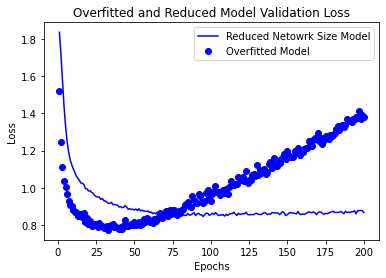

In [506]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = reducedNs_val_loss, style_1 = 'b', label_1 = 'Reduced Netowrk Size Model', y2 = Overfitted_val_loss, style_2 = 'bo', 
         label_2 = 'Overfitted Model', xlabel = 'Epochs', ylabel = 'Loss', title = 'Overfitted and Reduced Model Validation Loss')

> Comparing the reduced network validation loss with the overfitted model

> There is an improvement when the network was reduced from 64 to 16.

### 7.2.2 Model 2: Evaluation With 128 Neurons

In [511]:
# set the function arguments
neuron1 = 128
neuron2 = 128
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model(neuron1, neuron2, nEpoch, BatchSize)

# return the values per epoch
increasedNs_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
increasedNs_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
increasedNs_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
increasedNs_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.2.2.1 Plotting Validation Loss of the Higher Capacity Model in Comparison to Overfitted Model

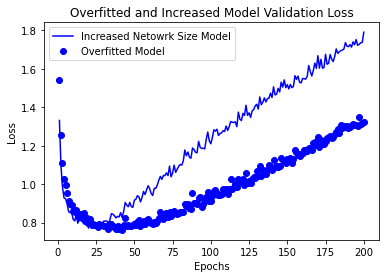

In [512]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = increasedNs_val_loss, style_1 = 'b', label_1 = 'Increased Netowrk Size Model', y2 = Overfitted_val_loss, style_2 = 'bo', 
         label_2 = 'Overfitted Model', xlabel = 'Epochs', ylabel = 'Loss', title = 'Overfitted and Increased Model Validation Loss')

> Network was increased from 64 to 128 and resulted in poor performance

### 7.2.3 Comparing Between Values With and Without Change in Network Size

In [632]:
reducedNs_acc = max(reducedNs_val_acc)
increasedNs_acc = max(increasedNs_val_acc)
Overfitted_acc = max(Overfitted_val_acc)

reducedNs_loss = min(reducedNs_val_loss)
increasedNs_loss = min(increasedNs_val_loss)
Overfitted_loss = min(Overfitted_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[reducedNs_acc, reducedNs_loss], [increasedNs_acc, increasedNs_loss], [Overfitted_acc, Overfitted_loss]],
             ['Reduced network size 16', 'Increased network size 128', 'Overfitted model size 64'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

,Validation Accuracy,Validation Loss
Reduced network size 16,0.712,0.879
Increased network size 128,0.761,0.772
Overfitted model size 64,0.758,0.762


#### 7.2.3.1 Plotting Validation Loss of Reduced and Higher Network In Comparison to Overfitted Model

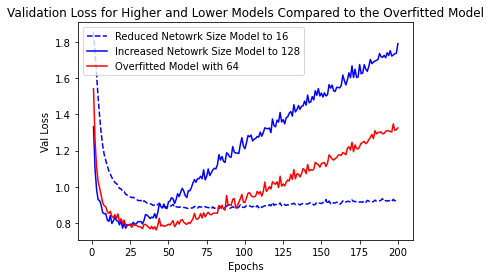

In [628]:
# comparing the overfitted model with lower and higher neurons
nEpoch = 200

epochs = range(1, nEpoch + 1)
plt.plot(epochs, reducedNs_val_loss, 'b--', label = 'Reduced Netowrk Size Model to 16') # b-- is for dashed blue
plt.plot(epochs, increasedNs_val_loss, 'b', label = 'Increased Netowrk Size Model to 128') # b is for solid blue line
plt.plot(epochs, Overfitted_val_loss, 'r', label = 'Overfitted Model with 64') # r is for solid red line

plt.title('Validation Loss for Higher and Lower Models Compared to the Overfitted Model')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

> The graph shows a significant improvement when the size was reduced, therefore the model will be modified with the new weight size = 16 and used during with the rest of modeling

## 7.3 Second Technique: Adding Weight Regularization
### 7.3.1 Model 1: Evaluation With L1 Regularizers

> The model here was updated with the reduced capacity of the network to 16 neurons, then will look here if regularization will further improve it. create_model_reg function was used to add the regularizer parameter

In [520]:
# rebuild the previous model by adding regularizer
def create_model_reg(neuron1, active1, neuron2, regularizer, optimizer):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, kernel_regularizer = regularizer, activation = active1, input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dense(neuron2, kernel_regularizer = regularizer, activation = active1))                          # add second hidden layer
    model.add(layers.Dense(7, activation = 'softmax'))        # add output layer

    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    return model

# model.summary()

> In addtition, the evaluation model also modified with the regularizer parameter

In [540]:
# call the evaluate model function
def evaluate_model_reg(neuron1, active1, neuron2, regularizer, optimizer, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val = x_train[iFold * nVal : (iFold + 1) * nVal]
        y_val = y_train[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train = np.concatenate([x_train[ : iFold * nVal], x_train[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train = np.concatenate([y_train[ : iFold * nVal], y_train[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model_reg(neuron1, active1, neuron2, regularizer, optimizer)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data = (x_val, y_val),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

In [530]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l1(0.001)
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_reg(neuron1, active1, neuron2, regularizer, optimizer, nEpoch, BatchSize)

# return the values per epoch
regL1_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
regL1_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
regL1_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
regL1_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.3.1.1 Plotting Validation Loss of L1 Regularizer in Comparison to Overfitted Model

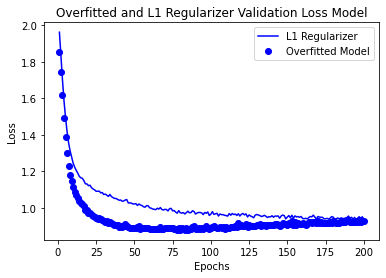

In [531]:
# call the plot function
plot(nEpoch = 200, y1 = regL1_val_loss, style_1 = 'b', label_1 = 'L1 Regularizer', y2 = reducedNs_val_loss, style_2 = 'bo', 
         label_2 = 'Overfitted Model', xlabel = 'Epochs', ylabel = 'Loss', title = 'Overfitted and L1 Regularizer Validation Loss Model')

### 7.3.2 Model 2: Evaluation With L2 Regularizer

In [532]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_reg(neuron1, active1, neuron2, regularizer, optimizer, nEpoch, BatchSize)

# return the values per epoch
regL2_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
regL2_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
regL2_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
regL2_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.3.2.1 Plotting Validation Loss of L2 Regularizer in Comparison to Overfitted Model

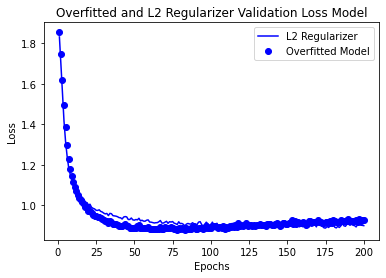

In [533]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = regL2_val_loss, style_1 = 'b', label_1 = 'L2 Regularizer', y2 = reducedNs_val_loss, style_2 = 'bo', 
         label_2 = 'Overfitted Model', xlabel = 'Epochs', ylabel = 'Loss', title = 'Overfitted and L2 Regularizer Validation Loss Model')

### 7.3.3 Model 3: Evaluation With L1_L2 Regularizers

In [534]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_reg(neuron1, active1, neuron2, regularizer, optimizer, nEpoch, BatchSize)

# return the values per epoch
regL1L2_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
regL1L2_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
regL1L2_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
regL1L2_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.3.3.1 Plotting Validation Loss of  L1_L2 Regularizer in Comparison to Overfitted Model

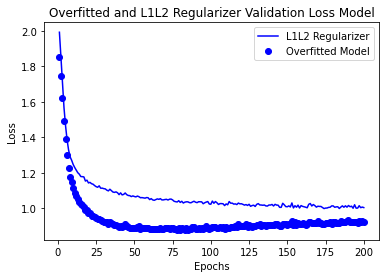

In [535]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = regL1L2_val_loss, style_1 = 'b', label_1 = 'L1L2 Regularizer', y2 = reducedNs_val_loss, style_2 = 'bo', 
         label_2 = 'Overfitted Model', xlabel = 'Epochs', ylabel = 'Loss', title = 'Overfitted and L1L2 Regularizer Validation Loss Model')

### 7.3.4 Comparing Between Values With and Without Regularizer

In [624]:
regL1_acc = max(regL1_val_acc)
regL2_acc = max(regL2_val_acc)
regL1L2_acc = max(regL1L2_val_acc)
reducedNs_acc = max(reducedNs_val_acc)

regL1_loss = min(regL1_val_loss)
regL2_loss = min(regL2_val_loss)
regL1L2_loss = min(regL1L2_val_loss)
reducedNs_loss = min(reducedNs_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[regL1_acc, regL1_loss], [regL2_acc, regL2_loss], [regL1L2_acc, regL1L2_loss], [reducedNs_acc, reducedNs_loss]],
             ['L1 Regularizer', 'L2 Regularizer', 'L1_L2 Regularizer', 'No Regularizer'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
L1 Regularizer,0.720,0.933
L2 Regularizer,0.730,0.888
L1_L2 Regularizer,0.705,0.999
No Regularizer,0.712,0.879


Best value: 0.879, Using ['No Regularizer']


#### 7.3.4.1 Plotting Validation Loss of L1, L2, L1_L2 Regularizers in Comparison to Model Without a regularizer

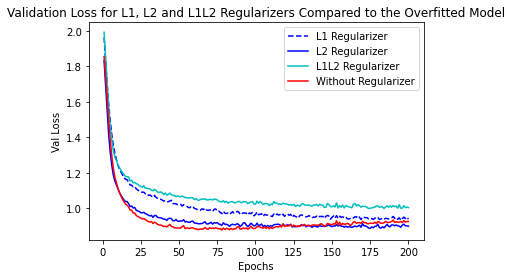

In [627]:
# compare the 3 different model with and without a regularizer
nEpoch = 200
epochs = range(1, nEpoch + 1)
plt.plot(epochs, regL1_val_loss, 'b--', label = 'L1 Regularizer') # b-- is for dashed blue
plt.plot(epochs, regL2_val_loss, 'b', label = 'L2 Regularizer') # b is for solid blue line
plt.plot(epochs, regL1L2_val_loss, 'c', label = 'L1L2 Regularizer') # c is for solid cyan line
plt.plot(epochs, reducedNs_val_loss, 'r', label = 'Without Regularizer') # r is for solid red line

plt.title('Validation Loss for L1, L2 and L1L2 Regularizers Compared to the Overfitted Model')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

> L2 regularizer was chosen as it showed improvment when compared to other models, even though the model without regularizer proved to have the lowest loss validation value, but after 100 epochs it shows slight overfitting

## 7.4 Third Technique: Adding Dropout
### 7.4.1 Model 1: Evaluation With 0.1 Dropout

> The model was redefined by adding dropout after each layer

In [549]:
def create_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, kernel_regularizer = regularizer, activation = active1, input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(neuron2, kernel_regularizer = regularizer, activation = active1))                          # add second hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(7, activation = 'softmax'))        # add output layer

    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    return model

# model.summary()

> applying the modified model to the evaluate it

In [550]:
# call the evaluate model function
def evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val = x_train[iFold * nVal : (iFold + 1) * nVal]
        y_val = y_train[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train = np.concatenate([x_train[ : iFold * nVal], x_train[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train = np.concatenate([y_train[ : iFold * nVal], y_train[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data = (x_val, y_val),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

In [551]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
drop01_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
drop01_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
drop01_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
drop01_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.4.1.1 Plotting Validation Loss of 0.1 Dropout in Comparison to Overfitted Model

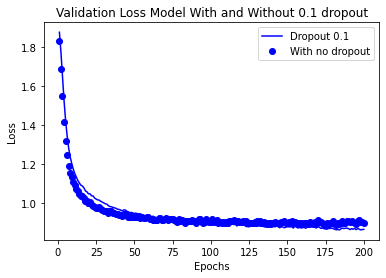

In [552]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = drop01_val_loss, style_1 = 'b', label_1 = 'Dropout 0.1', y2 = regL2_val_loss, style_2 = 'bo', 
         label_2 = 'With no dropout', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With and Without 0.1 dropout')

### 7.4.2 Model 2: Evaluation With 0.3 Dropout

In [553]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.3
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
drop03_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
drop03_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
drop03_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
drop03_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.4.2.1 Plotting Validation Loss of 0.3 Dropout in Comparison to Overfitted Model

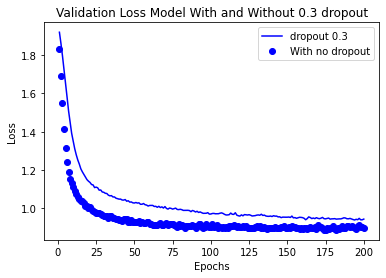

In [554]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = drop03_val_loss, style_1 = 'b', label_1 = 'dropout 0.3', y2 = regL2_val_loss, style_2 = 'bo', 
         label_2 = 'With no dropout', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With and Without 0.3 dropout')

### 7.4.3 Model 3: Evaluation With 0.5 Dropout

In [556]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.5
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
drop05_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
drop05_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
drop05_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
drop05_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 7.4.3.1 Plotting Validation Loss of 0.5 Dropout in Comparison to Overfitted Model

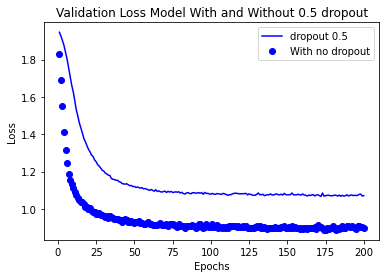

In [557]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = drop05_val_loss, style_1 = 'b', label_1 = 'dropout 0.5', y2 = regL2_val_loss, style_2 = 'bo', 
         label_2 = 'With no dropout', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With and Without 0.5 dropout')

### 7.4.4 Comparing Between Values With and Without Dropout

In [626]:
drop01_acc = max(drop01_val_acc)
drop03_acc = max(drop03_val_acc)
drop05_acc = max(drop05_val_acc)
regL2_acc = max(regL2_val_acc)

drop01_loss = min(drop01_val_loss)
drop03_loss = min(drop03_val_loss)
drop05_loss = min(drop05_val_loss)
regL2_loss = min(regL2_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[drop01_acc, drop01_loss], [drop03_acc, drop03_loss], [drop05_acc, drop05_loss], [regL2_acc, regL2_loss]],
             ['Dropout 0.1', 'Dropout 0.3', 'Dropout 0.5', 'No dropout'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
Dropout 0.1,0.724,0.862
Dropout 0.3,0.689,0.940
Dropout 0.5,0.611,1.067
No dropout,0.730,0.888


Best value: 0.862, Using ['Dropout 0.1']


#### 7.4.4.1 Plotting Validation Loss of 0.1, 0.3, 0.5 Dropout Values in Comparison to a Model Without Dropout

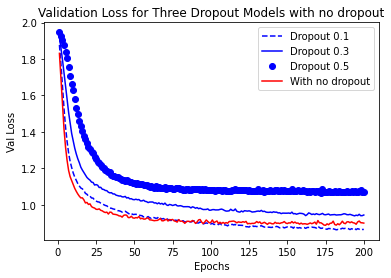

In [558]:
# compare 4 different models with and without dropout
nEpoch = 200
epochs = range(1, nEpoch + 1)
plt.plot(epochs, drop01_val_loss, 'b--', label = 'Dropout 0.1') # b-- is for dashed blue
plt.plot(epochs, drop03_val_loss, 'b', label = 'Dropout 0.3') # b is for solid blue line
plt.plot(epochs, drop05_val_loss, 'bo', label = 'Dropout 0.5') # bo is for blue dot
plt.plot(epochs, regL2_val_loss, 'r', label = 'With no dropout') # r is for solid red line

plt.title('Validation Loss for Three Dropout Models with no dropout')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

> With dropout 0.1, the loss function improved after around 100 epochs

# 8. Hyperparameters Tuning

> Some caution should be applied here when choosing the batch size. As neurons with less than 8 will cause information bottleneck as number of labels or output layers are 7. Also keeping in mind that the batch size values have to be to power of 2

## 8.1 Batch Size
### 8.1.1 Model 1: Evaluation With Batch Size 8

In [641]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 8

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
batch08_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
batch08_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
batch08_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
batch08_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 8.1.1.1 Plotting Validation Loss Model With 16 and 8 Batch Size

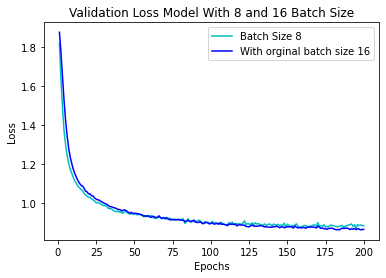

In [642]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = batch08_val_loss, style_1 = 'c', label_1 = 'Batch Size 8', y2 = drop01_val_loss, style_2 = 'b', 
         label_2 = 'With orginal batch size 16', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With 8 and 16 Batch Size')

### 8.1.2 Model 2: Evaluation With Batch Size 64

In [643]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 64

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
batch64_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
batch64_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
batch64_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
batch64_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 8.1.2.1 Plotting Validation Loss Model With 16 and 64 Batch Size

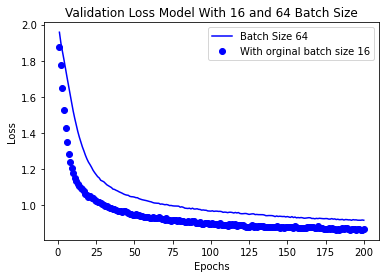

In [644]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = batch64_val_loss, style_1 = 'b', label_1 = 'Batch Size 64', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = 'With orginal batch size 16', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With 16 and 64 Batch Size')

### 8.1.3 Model 3: Evaluation With Batch Size 256

In [645]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 256

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
batch256_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
batch256_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
batch256_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
batch256_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 8.1.3.1 Plotting Validation Loss Model With 16 and 256 Batch Size

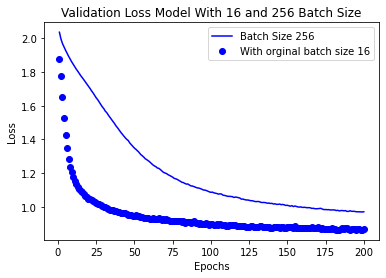

In [646]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = batch256_val_loss, style_1 = 'b', label_1 = 'Batch Size 256', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = 'With orginal batch size 16', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With 16 and 256 Batch Size')

### 8.1.4 Comparing Between Values With and Without Changing in Batch Size

In [760]:
batch08_acc = max(batch08_val_acc)
batch64_acc = max(batch64_val_acc)
batch256_acc = max(batch256_val_acc)
drop01_acc = max(drop01_val_acc)

batch08_loss = min(batch08_val_loss)
batch64_loss = min(batch64_val_loss)
batch256_loss = min(batch256_val_loss)
drop01_loss = min(drop01_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[batch08_acc, batch08_loss], [batch64_acc, batch64_loss], [batch256_acc, batch256_loss], [drop01_acc, drop01_loss]],
             ['Batch size 8', 'Batch size 64', 'Batch size 256', 'Original batch size 16'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
Batch size 8,0.721,0.872
Batch size 64,0.703,0.916
Batch size 256,0.664,0.969
Original batch size 16,0.724,0.862


Best value: 0.862, Using ['Original batch size 16']


#### 8.1.4.1 Plotting Validation Loss of 8, 16, 64 and 256

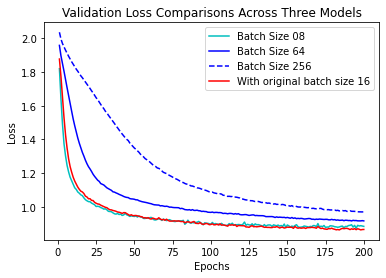

In [648]:
# plot 4 different models with batch size values 8, 64,256 and 16 
nEpoch = 200

epochs = range(1, nEpoch + 1)
plt.plot(epochs, batch08_val_loss, 'c', label = 'Batch Size 08') # c is for solid cyan line
plt.plot(epochs, batch64_val_loss, 'b', label ='Batch Size 64') # b is for solid blue line
plt.plot(epochs, batch256_val_loss, 'b--', label = 'Batch Size 256') # b-- is for Dashed blue line
plt.plot(epochs, drop01_val_loss, 'r', label = 'With original batch size 16') # r is for solid red line

plt.title('Validation Loss Comparisons Across Three Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

> The original batch of size 16 will remain as is, since it performed better than the other values, with almost same trend for batch size 8

## 8.2 Learning Rate
### 8.2.1 Model 1: Evaluation With L1 Learning Rate

> Different values for learning rate were applied, and compared with the default value which is RMSprop (learning_rate = 0.00)

In [657]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = optimizers.RMSprop (learning_rate = 0.002)
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
lr002_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
lr002_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
lr002_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]
lr002_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]

#### 8.2.1.1 Plotting Validation Loss with Default and 0.002 Learning Rate

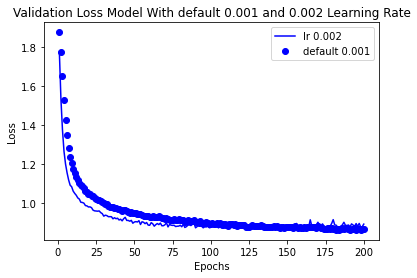

In [658]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = lr002_val_loss, style_1 = 'b', label_1 = 'lr 0.002', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = 'default 0.001', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With default 0.001 and 0.002 Learning Rate')

### 8.2.2 Model 2: Evaluation With L2 Learning Rate

In [652]:
lr01_val_loss = val_loss

# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = optimizers.RMSprop (learning_rate = 0.01)
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
lr01_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
lr01_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
lr01_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]
lr01_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]

#### 8.2.2.1 Plotting Validation Loss with Default and 0.01 Learning Rate

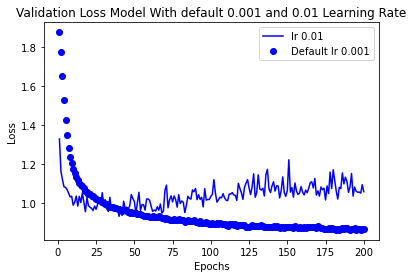

In [654]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = lr01_val_loss, style_1 = 'b', label_1 = 'lr 0.01', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = 'Default lr 0.001', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With default 0.001 and 0.01 Learning Rate')

### 8.2.3 Comparing Between Values With and Without Changing in Learning Rate

In [659]:
lr002_acc = max(lr002_val_acc)
lr01_acc = max(lr01_val_acc)
drop01_acc = max(drop01_val_acc)

lr002_loss = min(lr002_val_loss)
lr01_loss = min(lr01_val_loss)
drop01_loss = min(drop01_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[lr002_acc, lr002_loss], [lr01_acc, lr01_loss], [drop01_acc, drop01_loss]],
             ['Learning Rate 0.002', 'Learning Rate 0.01', 'Original Learning Rate 0.001'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
Learning Rate 0.002,0.729,0.871
Learning Rate 0.01,0.694,0.932
Original Learning Rate 0.001,0.724,0.862


Best value: 0.862, Using ['Original Learning Rate 0.001']


#### 8.2.3.1 Plotting Training and Validation Loss of 0.001, 0.002 and 0.01 Learning Rate

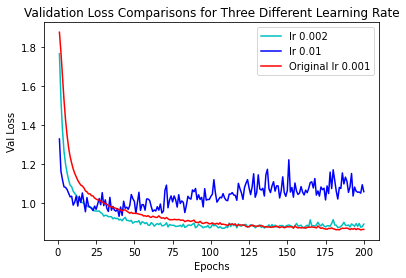

In [660]:
#  plot 3 different models with default lr, 0.01 and 0.002
nEpoch = 200

epochs = range(1, nEpoch + 1)
plt.plot(epochs, lr002_val_loss, 'c', label = 'lr 0.002') # c is for solid cyan line
plt.plot(epochs, lr01_val_loss, 'b', label ='lr 0.01') # b is for solid blue line
plt.plot(epochs, drop01_val_loss, 'r', label = 'Original lr 0.001') # r is for solid red line

plt.title('Validation Loss Comparisons for Three Different Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

> The default learning rate will be set as an optimum value, even though in the beginning learning rate 0.002 showed improvement then it started to overfit at around 160 epochs

## 8.3 Activation Function

> tanh old activation function was tested and compared to relu

### 8.3.1 Evaluation With tanh Activation Function

In [661]:
# set the function arguments
neuron1 = 16
active1 = 'tanh'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
tanh_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
tanh_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
tanh_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
tanh_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

#### 8.3.1.1 Plotting Validation Loss With relu and tanh Activation Function

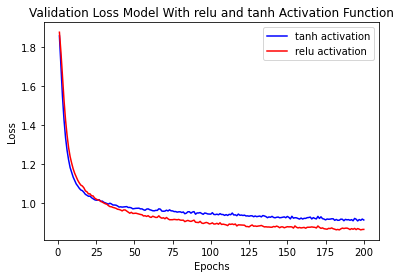

In [662]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = tanh_val_loss, style_1 = 'b', label_1 = 'tanh activation', y2 = drop01_val_loss, style_2 = 'r', 
         label_2 = 'relu activation', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With relu and tanh Activation Function')

#### 8.3.1.2 Comparing Between Values With and Without Changing in Learning Rate

In [761]:
tanh_acc = max(tanh_val_acc)
drop01_acc = max(drop01_val_acc)

tanh_loss = min(tanh_val_loss)
drop01_loss = min(drop01_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[tanh_acc, tanh_loss], [drop01_acc, drop01_loss]],
             ['tanh activation', 'relu activation'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
tanh activation,0.707,0.909
relu activation,0.724,0.862


Best value: 0.862, Using ['relu activation']


## 8.4 Layers

### 8.4.1 Adding 1 Layer

In [667]:
# add one hidden layer
def create_model_add_layer(neuron1, active1, neuron2, neuron3, regularizer, drop_value, optimizer):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, kernel_regularizer = regularizer, activation = active1, input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(neuron2, kernel_regularizer = regularizer, activation = active1))                          # add second hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(neuron3, kernel_regularizer = regularizer, activation = active1))                          # add third hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(7, activation = 'softmax'))        # add output layer

    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    return model

# model.summary()

In [670]:
# call the evaluate model function
def evaluate_model_add_layer(neuron1, active1, neuron2, neuron3, regularizer, drop_value, optimizer, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val = x_train[iFold * nVal : (iFold + 1) * nVal]
        y_val = y_train[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train = np.concatenate([x_train[ : iFold * nVal], x_train[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train = np.concatenate([y_train[ : iFold * nVal], y_train[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model_add_layer(neuron1, active1, neuron2, neuron3, regularizer, drop_value, optimizer)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data = (x_val, y_val),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

#### 8.4.1.1 Evaluation With Adding 1 Hidden Layer

In [671]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
neuron3 = 8
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_add_layer(neuron1, active1, neuron2, neuron3, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
add_layer_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
add_layer_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
add_layer_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
add_layer_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

##### 8.4.1.1.1 Plotting Loss Validation With and Without Adding Hidden Layer

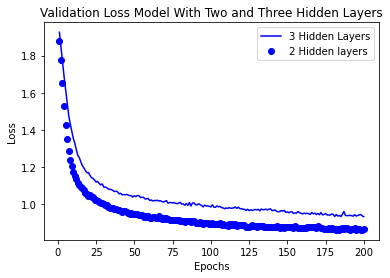

In [672]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = add_layer_val_loss, style_1 = 'b', label_1 = '3 Hidden Layers', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = '2 Hidden layers', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With Two and Three Hidden Layers')

### 8.4.2 Removing 1 Layer

In [689]:
def create_model_remove_layer(neuron1, active1, regularizer, drop_value, optimizer):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, kernel_regularizer = regularizer, activation = active1, input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(7, activation = 'softmax'))        # add output layer

    # compiling the netwrok
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    return model

# model.summary()

In [690]:
# call the evaluate model function
def evaluate_model_remove_layer(neuron1, active1, regularizer, drop_value, optimizer, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val = x_train[iFold * nVal : (iFold + 1) * nVal]
        y_val = y_train[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train = np.concatenate([x_train[ : iFold * nVal], x_train[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train = np.concatenate([y_train[ : iFold * nVal], y_train[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model_remove_layer(neuron1, active1, regularizer, drop_value, optimizer)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train, partial_y_train,
                            validation_data = (x_val, y_val),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

#### 8.4.2.1 Evaluation With Removing 1 Hidden Layer

In [691]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_remove_layer(neuron1, active1, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
remove_layer_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
remove_layer_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
remove_layer_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
remove_layer_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

##### 8.4.2.1.1 Plotting Loss Validation With and Without Removing Hidden Layer

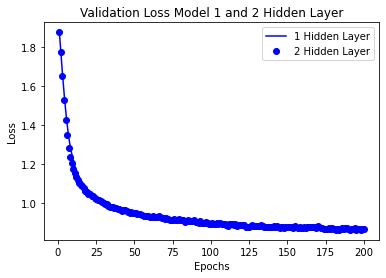

In [692]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = remove_layer_val_loss, style_1 = 'b', label_1 = '1 Hidden Layer', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = '2 Hidden Layer', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model 1 and 2 Hidden Layer')

#### 8.4.2.2 Comparing Between Values With Different Hidden Layer Size

In [747]:
remove_layer_acc = max(remove_layer_val_acc)
add_layer_acc = max(add_layer_val_acc)
drop01_acc = max(drop01_val_acc)

remove_layer_loss = min(remove_layer_val_loss)
add_layer_loss = min(add_layer_val_loss)
drop01_loss = min(drop01_val_loss)

# summarizing the results in a data frame
df_summary = pd.DataFrame([[remove_layer_acc, remove_layer_loss], [add_layer_acc, add_layer_loss], [drop01_acc, drop01_loss]],
             ['1 Hidden Layer', '3 Hidden Layer', '2 Hidden Layer'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
1 Hidden Layer,0.720,0.871
3 Hidden Layer,0.708,0.934
2 Hidden Layer,0.724,0.862


Best value: 0.862, Using ['2 Hidden Layer']


# 9. Another Approach by Using Integer Encoding for the Target Variable

> Alternative way to handle labeling of the target variable is by casting as integer tensors instead of using one-hot. That will only have an impact on the loss function, so instead of 'categorical_crossentropy', **'sparse_categorical_crossentropy'** will be utilized. The mathematics behind the loss function should be same as for one hot encoding, only the interface is differ

> Same steps as above are followed:

## 9.1 Split Dataset into Train/Test Set 

In [748]:
x_train_int, x_test_int, y_train_int, y_test_int = train_test_split(x, y, test_size = 0.2, random_state = seed)

## 9.2 Building the Network

In [749]:
# redefine the model with the new loss function
def create_model_int(neuron1, active1, neuron2, regularizer, drop_value, optimizer):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(neuron1, kernel_regularizer = regularizer, activation = active1, input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(neuron2, kernel_regularizer = regularizer, activation = active1))                          # add second hidden layer
    model.add(layers.Dropout(drop_value))
    model.add(layers.Dense(7, activation = 'softmax'))        # add output layer                            # add output layer

    # comiling the model
    model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizers.RMSprop (learning_rate = 0.002))

    return model

# model.summary()

## 9.3  Splitting the Training Set Using K-fold Cross-validation

In [750]:
# call the evaluate model function
def evaluate_model_int(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize):
    
    # those was set to be global so they can be called outside the function
    global results_val_loss
    global results_val_acc
    global results_train_loss
    global results_train_acc
              
    # number of folds
    nFolds = 5
    nVal = len(x_train_int) // nFolds
   
    # empty list to save the validation loss values and accuracy values
    results_val_loss = []
    results_val_acc = []
    results_train_loss = []
    results_train_acc = []

    for iFold in range(nFolds): # for each fold in the range of number of all folds
        # print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  

        # Prepare the validation data
        x_val_int = x_train_int[iFold * nVal : (iFold + 1) * nVal]
        y_val_int = y_train_int[iFold * nVal : (iFold + 1) * nVal]

        # initialize the partial training data
        partial_x_train_int = np.concatenate([x_train_int[ : iFold * nVal], x_train_int[(iFold + 1) * nVal : ]], axis=0)
        partial_y_train_int = np.concatenate([y_train_int[ : iFold * nVal], y_train_int[(iFold + 1) * nVal : ]], axis=0)

        # call the compiled model
        model = create_model_int(neuron1, active1, neuron2, regularizer, drop_value, optimizer)

        # fit the model using partial x train and y train and validate it in x validation and y validation 
        history = model.fit(partial_x_train_int, partial_y_train_int,
                            validation_data = (x_val_int, y_val_int),
                            epochs = nEpoch, batch_size = BatchSize, verbose = 0)
        
        results_val_loss.append(history.history['val_loss'])
        results_val_acc.append(history.history['val_accuracy'])
        results_train_loss.append(history.history['loss'])
        results_train_acc.append(history.history['accuracy'])

## 9.4 Model Evaluation

In [754]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_int(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
int_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
int_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
int_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
int_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

### 9.4.1 Integer and One-hot Encoding Validation Loss

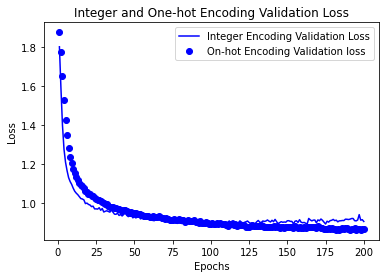

In [755]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = int_val_loss, style_1 = 'b', label_1 = 'Integer Encoding Validation Loss', y2 = drop01_val_loss, style_2 = 'bo', 
         label_2 = 'On-hot Encoding Validation loss', xlabel = 'Epochs', ylabel = 'Loss', title = 'Integer and One-hot Encoding Validation Loss')

### 9.4.2 Integer and One-hot Encoding Validation Accuracy

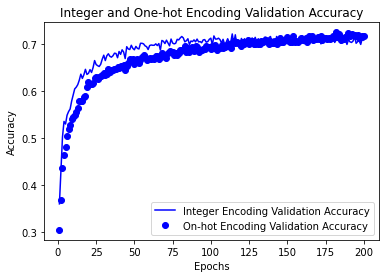

In [756]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = int_val_acc, style_1 = 'b', label_1 = 'Integer Encoding Validation Accuracy', y2 = drop01_val_acc, style_2 = 'bo', 
         label_2 = 'On-hot Encoding Validation Accuracy', xlabel = 'Epochs', ylabel = 'Accuracy', title = 'Integer and One-hot Encoding Validation Accuracy')

### 9.4.3 Comparing Between Integer and One-hot Encoding Loss and Accuracy

In [758]:
int_acc = max(int_val_acc)
drop01_acc = max(drop01_val_acc)

int_loss = min(int_val_loss)
drop01_loss = min(drop01_val_loss )

# summarizing the results in a data frame
df_summary = pd.DataFrame([[drop01_acc, drop01_loss], [int_acc, int_loss]],
             ['One-hot Encoding', 'Integer Encoding'],    
             columns=['Validation Accuracy', 'Validation Loss']).round(3)
display(df_summary)

value = min(df_summary['Validation Loss'])
item = df_summary[['Validation Loss']].idxmin().tolist()

print('Best value: {}, Using {}'.format(value, item))

,Validation Accuracy,Validation Loss
One-hot Encoding,0.724,0.862
Integer Encoding,0.721,0.889


Best value: 0.862, Using ['One-hot Encoding']


# 10. Optimum Epoch

> The optimum value for epoch will be used later along with all the tunning hyperparameters to retrain the model on unseen data

> The optimum value is when the loss validation has its lowest score

In [551]:
# set the function arguments
neuron1 = 16
active1 = 'relu'
neuron2 = 16
regularizer = regularizers.l2(0.001)
drop_value = 0.1
optimizer = 'rmsprop'
nEpoch = 200
BatchSize = 16

# call the evaluate function
evaluate_model_drop(neuron1, active1, neuron2, regularizer, drop_value, optimizer, nEpoch, BatchSize)

# return the values per epoch
drop01_val_loss = [np.mean([x[i] for x in results_val_loss]) for i in range(nEpoch)]
drop01_val_acc = [np.mean([x[i] for x in results_val_acc]) for i in range(nEpoch)]
drop01_train_loss = [np.mean([x[i] for x in results_train_loss]) for i in range(nEpoch)]
drop01_train_acc = [np.mean([x[i] for x in results_train_acc]) for i in range(nEpoch)]

## 10.1 Plotting Validation Loss

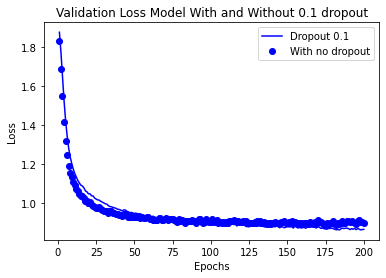

In [552]:
# call plot function and set its arguments
plot(nEpoch = 200, y1 = drop01_val_loss, style_1 = 'b', label_1 = 'Dropout 0.1', y2 = regL2_val_loss, style_2 = 'bo', 
         label_2 = 'With no dropout', xlabel = 'Epochs', ylabel = 'Loss', title = 'Validation Loss Model With and Without 0.1 dropout')

In [6]:
print(np.argmin(drop01_loss))

100

# 11. Training the Final Model on the Whole x_train and y_train

> Getting back to the traget variable with one-hot encoding, and using the optimum hyperparameters that were evaluated.

> Model was trained in the partial training set, validated in the validation set and the hyperparameters were tuned. In this phase those hyperparameters were adjusted to be test in the test set

> Retraining the all the dataset with optimum hyperparameter and epoch values

> Optimum value was chosen based on the the last model 

In [807]:
# split the data into train and test 80/20 subsequently
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size = 0.2, random_state = seed)

In [831]:
# create an empty network
model = Sequential()

# adding layers
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (25,)))     # add first hidden layer
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))                          # add second hidden layer
model.add(layers.Dropout(0.1))
model.add(layers.Dense(7, activation = 'softmax'))        # add output layer

# compiling the netwrok
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizers.RMSprop (learning_rate = 0.002))

# retrain the model with the full dataset
model.fit(x_train, y_train, epochs = 100, batch_size = 16, verbose = 0)
final_loss_score, final_accuracy_score = model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.7368


In [832]:
print('Final Model Accuracy:' , '%.2f'% (final_accuracy_score *100), '%')
print('Final Model Loss:' ,'%.3f'% final_loss_score)

Final Model Accuracy: 73.68 %
Final Model Loss: 0.863


## 11.1 Comparison Between the Baseline, Trained and Final Model

In [836]:
opt_val_acc = max(drop01_val_acc)
opt_val_loss = min(drop01_val_loss )

# summarizing the results in a data frame
df_summary = pd.DataFrame([[baseline_accuracy, baseline_loss], [opt_val_acc, opt_val_loss], [final_accuracy_score, final_loss_score]],
             ['Baseline Model' , 'Trained Model', 'Final Model on Unseen Data'],    
             columns=['Accuracy', 'Loss']).round(3)
display(df_summary)

,Accuracy,Loss
Baseline Model,0.402,1.650
Trained Model,0.703,0.910
Final Model on Unseen Data,0.737,0.863


## 11.2 Generating Predictions on New Data

Once you choose and fit a final deep learning model in Keras, you can use it to make predictions on new data instances.

In [857]:
y_pred = model.predict(x_test)
Y_pred = np.argmax(y_pred, axis = 1)
Y_est = np.argmax(y_test, axis = 1)

#### 11.3 Model Evaluation

In [858]:
print("Classification Report:\n" , classification_report(Y_pred, Y_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        54
           1       0.65      0.52      0.57        64
           2       0.63      0.68      0.65        71
           3       0.97      0.92      0.95        76
           4       1.00      0.99      0.99        67
           5       0.35      0.56      0.43        32
           6       0.67      0.67      0.67        54

    accuracy                           0.74       418
   macro avg       0.72      0.72      0.71       418
weighted avg       0.76      0.74      0.74       418



## 11.4 Confusion Matrix

[[37  8  0  0  0  1  1]
 [10 33  3  0  0  2  3]
 [ 1  4 48  5  0  7 11]
 [ 0  1  1 70  0  0  0]
 [ 0  0  0  0 66  0  0]
 [ 5 13 13  0  0 18  3]
 [ 1  5  6  1  1  4 36]]


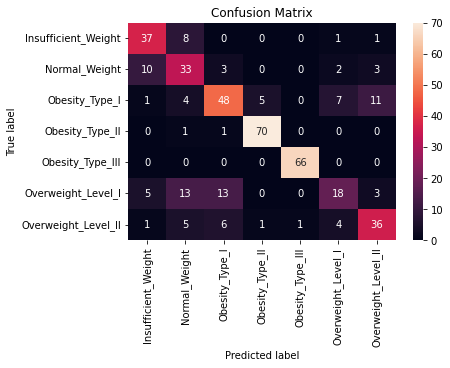

In [862]:
matrix = confusion_matrix(Y_test, Y_pred)
print(matrix)

ax = plt.axes()  # initilize it to set the title
ax.set_title('Confusion Matrix') # add title
x_axis_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
y_axis_labels = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

df_cm = pd.DataFrame(matrix)
df_cm.index.name = 'True label' # label y axis
df_cm.columns.name = 'Predicted label' # label x axis

# plot the confusion matrix
sns.heatmap(df_cm, annot = True, ax = ax, fmt = "d", xticklabels = x_axis_labels, yticklabels = y_axis_labels);

> The final model is able to achieve 74% accuracy on the test dataset. Moreover, the model was not reliable to predict Overweight_Level_I class accurately.

> # Section Three

## 1. Results

-  Throughout the analysis, accuracy and loss scores were tested, but for making a decision the line graph was plotted to get a full picture if the model is changed after getting a good score on accuracy/ loss

- The baseline model achieved accuracy of 40% 

- 3 models were initiatlez to beat the baseline with by adding more epochs and increasing the hyperparameters values and achieved Model 1 Score: 49 %, Model 2 Score: 71 % and Model 3 Score: 76 %    

- The handle overfitted model, there were 2 models with **reduced network size** to 16 which achived 71.2% accuracy and another model with increased network size to 128 which achieved 76.1%. There was a significant improvement to the overfitted model using the reduced network size technique

- 2nd Technique is **Adding Weight Regularization**, with L1 Regularizer achieved 72.0%, L2 Regularizer achieved 73.0% and L1_L2 Regularizer achieved 70.5% accuracy. However, same model without regularizer achieved 71.2% accuracy. L2 regularizer was outperform hte model without regularizer especially after 100 epochs

- 3rd Technique: **Adding Dropout**, model with Dropout 0.1, 0.3 and 0.5 achieved 72.4%, 68.9% and 61.1% respectivly. However with No dropout accuracy was better at 73.0%. Dropout 0.01 was beated the model without dropout after around 80 epochs

- Hyperparameters Tuning on **batch size** 8, 64 and 265 achieved 72.1%, 70.3% and 66.4% respectivly. However, with the orginial batch size 16 performance was better at 72.4% accuracy

- Next 3 models have been tested with **different learning rates** 0.002 which achieved 72.9% and 0.01 rate which achieved 69.4% while the original rate outperform at 72.4%

- When testing with different **activation function** tanh accuracy was 70.7% while relu function achieved better accuracy at 72.4%

- Another Approach by Using Integer Encoding for the Target Variable achieved One-hot Encoding achieved 72.4% and Integer Encoding reached 72.1% accuracy

- The final model was able to achieve accuracy of 74%  

- The same model was tested with 1 & 3 Hidden Layers and achieved 72.0% and 72.4% respectively 

## 2. Conclusions

- In this coursework, a single label multiclass classification problem was used. The neural networks model has been developed to predict obesity levels based on eating habits and physical condition. Various hyperparameters were used and tuned. The open-source library, TensorFlow, was used along with its Keras library to generate the neural network model.

- A baseline model was initialised with a single hidden layer of the same size as the input, where the output was the number of classes of the target variable. K-fold validation was used, given the dataset is relatively small, to avoid splitting the training set again into validation set.

- A statistical power model, that beats the basline, was generated and enhanced by adding more layers, epochs, neurons, and batch size until it overfitted.

- To overcome the overfitting, 3 approaches were applied effectivley to help the model to outperform the overfitted model.

- The hyperparameters did not improve the model, especially after applying the overfitting approaches. That implies the hyperparameters that were used initially during regularisation were optimum values for the model.

- The model was set to have only 2 hidden layer as the number of training data is relaively small, thus avoid severe overfitting

- Then the model was tuned using the optimum epoch with different hyperparameters values and tested on unseen data. Finally, a model evaluation was applied, and as a result, the final model slightly improved with higher accuracy and not showing overfitting.

- Eventually, the model was able to predict the obesity level based on eating habits and physical conditions with a 74% accuracy

- During the modelling phases, some caution is given to avoid bottlenecks by having too few neurons or having too many, which may cause overfitting. On the other hand, information leak was kept in mind to avoid running the model too much; therefore, some information regarding the validation might be leaked, and the test set was given as the last step after performing all the tuning to avoid leaking information of unseen data which could result on having a weak model

## 3. References

1. “UCI Machine Learning Repository: Data Set.” https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition (accessed Nov. 23, 2021).
2. Chollet, F. (2017), Deep Learning with Python , Manning .
3. “ObesityDataSet: EDA, Data Prep, ML & HyperTuning | Kaggle.” https://www.kaggle.com/pmrich/obesitydataset-eda-data-prep-ml-hypertuning#Machine-Learning-Models (accessed Dec. 23, 2021).
4. “Estimation-of-Obesity-levels-based-on-Eating-habits-and-Physical-Conditions-using-ML/Estimation of obesity levels .ipynb at main · sahanaraguram2000/Estimation-of-Obesity-levels-based-on-Eating-habits-and-Physical-Conditions-using-ML.” https://github.com/sahanaraguram2000/Estimation-of-Obesity-levels-based-on-Eating-habits-and-Physical-Conditions-using-ML/blob/main/Estimation%20of%20obesity%20levels%20.ipynb (accessed Dec. 23, 2021).
5. “What is One-Hot Encoding and how to use Pandas get_dummies function | by B. Chen | Towards Data Science.” https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970 (accessed Dec. 21, 2021).
6. “How to use Data Scaling Improve Deep Learning Model Stability and Performance.” https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/ (accessed Dec. 21, 2021).
7. “Diabetes Prediction with Neural Network in Keras | by S Joel Franklin | DataDrivenInvestor.” https://medium.datadriveninvestor.com/hyperparameter-tuning-with-deep-learning-grid-search-8630aa45b2da (accessed Dec. 21, 2021).
8. A. Hruby and F. B. Hu, “The Epidemiology of Obesity: A Big Picture,” PharmacoEconomics, vol. 33, no. 7, p. 673, Dec. 2015, doi: 10.1007/S40273-014-0243-X.
9-

## 4. Appendix

## 4.1 Auto Hyperparameter Tuning Using Grid Search

This an automated option, as the manual was the prefered option to have a chance to go through things instead of using auto or for loops

In [1689]:
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size = 0.2, random_state = seed)

# # Defining the model
def develop_model(neuron1, neuron2):

    # create an empty network
    model = Sequential()

    # adding layers
    model.add(layers.Dense(16,  kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (25,)))     # add first hidden layer
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16,  kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))                          # add second hidden layer
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(7, activation = 'softmax'))                         # add output layer

    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizers.RMSprop (learning_rate = 0.002))

    return model


#Create the model
model = KerasClassifier(build_fn = develop_model, verbose = 0)

# Define the grid search parameters
batch_size = [8, 16, 32, 64, 128, 256]
neuron1 = [8, 16, 32, 64]
neuron2 = [8, 16, 32, 64]

# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size, neuron1 = neuron1, neuron2 = neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grids, cv = KFold(), verbose = 0)
grid_result = grid.fit(partial_x_train, partial_y_train, verbose = 0)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.35479065775871277, using {'batch_size': 8, 'neuron1': 64, 'neuron2': 32}
0.2784476578235626,0.044694129240552556 with: {'batch_size': 8, 'neuron1': 8, 'neuron2': 8}
0.3354128211736679,0.10347513697423558 with: {'batch_size': 8, 'neuron1': 8, 'neuron2': 16}
0.2560651868581772,0.06698996667495324 with: {'batch_size': 8, 'neuron1': 8, 'neuron2': 32}
0.30238973498344424,0.027902704633127412 with: {'batch_size': 8, 'neuron1': 8, 'neuron2': 64}
0.3285566568374634,0.03924423703206159 with: {'batch_size': 8, 'neuron1': 16, 'neuron2': 8}
0.24699815213680268,0.039725387125359925 with: {'batch_size': 8, 'neuron1': 16, 'neuron2': 16}
0.2724579334259033,0.011995262161671702 with: {'batch_size': 8, 'neuron1': 16, 'neuron2': 32}
0.3248840093612671,0.037731816514005034 with: {'batch_size': 8, 'neuron1': 16, 'neuron2': 64}
0.314316064119339,0.060126024252520144 with: {'batch_size': 8, 'neuron1': 32, 'neuron2': 8}
0.3218234658241272,0.030024790675080893 with: {'batch_size': 8, 'neuron1': 32, 'n

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
